<a href="https://colab.research.google.com/github/icampuzanov/SIS420-2_2023/blob/main/Examen1LAB-RegresionMultivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# utilizado para manejos de directorios y rutas
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
#Carga de dataset
data = pd.read_csv('/content/Sport car price.csv')


In [43]:
columnas_eliminar = ['Engine Size (L)']
simbolo = 'Electric Motor'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '7', regex=False)



columnas_eliminar = ['Price (in USD)']
simbolo = ','

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)


# Lista de columnas categóricas que deseas convertir
columnas_categoricas = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']

# Convertir las columnas categóricas a numéricas
for columna in columnas_categoricas:
    data[columna] = pd.to_numeric(data[columna], errors='coerce')




In [44]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
# variables fechas
# columnas_fechas = data.select_dtypes(include=['datetime64']).columns



#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])



#llenar datos vacios
columnas_especificas = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)


In [45]:
print(data)

      Car Make  Car Model  Year  Engine Size (L)  Horsepower  Torque (lb-ft)  \
0           28         18  2022              3.0       379.0           331.0   
1           16         98  2021              5.2       630.0           443.0   
2           11          5  2022              3.9       661.0           561.0   
3            5        130  2022              5.2       562.0           406.0   
4           21         15  2021              4.0       710.0           568.0   
...        ...        ...   ...              ...         ...             ...   
1002        15         99  2022              5.0      1280.0          1106.0   
1003        18         76  2021              7.0      1972.0          1254.0   
1004        21        157  2021              4.0       789.0           590.0   
1005        25         95  2021              6.0       764.0           738.0   
1006        29        122  2021              7.0      1888.0          1696.0   

      0-60 MPH Time (seconds)  Price (i

In [46]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   int64  
 1   Car Model                1007 non-null   int64  
 2   Year                     1007 non-null   int64  
 3   Engine Size (L)          1007 non-null   float64
 4   Horsepower               1007 non-null   float64
 5   Torque (lb-ft)           1007 non-null   float64
 6   0-60 MPH Time (seconds)  1007 non-null   float64
 7   Price (in USD)           1007 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 63.1 KB


In [21]:
# Lectura de Datos
columnas_seleccionadas = list(range(0, 7))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 7].values.reshape(-1,1)


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1,1))



In [47]:
print(y)

[[-0.38055918]
 [-0.1458704 ]
 [-0.065432  ]
 ...
 [ 0.83739957]
 [ 3.00555042]
 [ 2.73453157]]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [53]:
# Modelo de regresión lineal expresado en una clase
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Salida: una dimensión

    def forward(self, x):
        return self.linear(x)

In [54]:
#Dimensiones de entrada y salida del modelo
input_size = X_train.shape[1] # El número de características en X
output_size = 1

In [55]:
modelo = LinearRegression(input_size)
criterio = nn.MSELoss()
optimizador = optim.SGD(modelo.parameters(), lr=0.01)


In [56]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = modelo(X_train_tensor)
    loss = criterio(outputs, y_train_tensor)

    # Backward pass y optimización
    optimizador.zero_grad()
    loss.backward()
    optimizador.step()

    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch + 1}/{num_epochs}], Pérdida: {loss.item():.4f}')

Época [100/1000], Pérdida: 0.4052
Época [200/1000], Pérdida: 0.3731
Época [300/1000], Pérdida: 0.3612
Época [400/1000], Pérdida: 0.3544
Época [500/1000], Pérdida: 0.3497
Época [600/1000], Pérdida: 0.3460
Época [700/1000], Pérdida: 0.3431
Época [800/1000], Pérdida: 0.3408
Época [900/1000], Pérdida: 0.3389
Época [1000/1000], Pérdida: 0.3374


In [61]:
#Pruebas
import random
num_examples_to_show = 10

y_pred = modelo(X_test_tensor)

#Obtén índices aleatorios de ejemplos en el conjunto de prueba
random_indices = random.sample(range(len(X_test)), num_examples_to_show)


for i in random_indices:
    real_value = scaler_y.inverse_transform(y_test[i].reshape(-1, 1))[0][0]
    predicted_value = scaler_y.inverse_transform(y_pred[i].detach().numpy().reshape(-1, 1))[0][0]
    print(f'Test {i + 1}: Precio Real vs Predecido: {real_value:.2f}, : {predicted_value:.2f}')


Test 189: Precio Real vs Predecido: 218400.00, : 469846.41
Test 25: Precio Real vs Predecido: 75400.00, : -61415.56
Test 158: Precio Real vs Predecido: 60695.00, : 624386.75
Test 102: Precio Real vs Predecido: 92950.00, : 153468.09
Test 175: Precio Real vs Predecido: 500000.00, : 322813.72
Test 23: Precio Real vs Predecido: 417650.00, : 516302.97
Test 137: Precio Real vs Predecido: 105000.00, : -70549.90
Test 202: Precio Real vs Predecido: 274280.00, : 438797.28
Test 106: Precio Real vs Predecido: 76400.00, : 110404.82
Test 200: Precio Real vs Predecido: 142086.00, : 72953.38


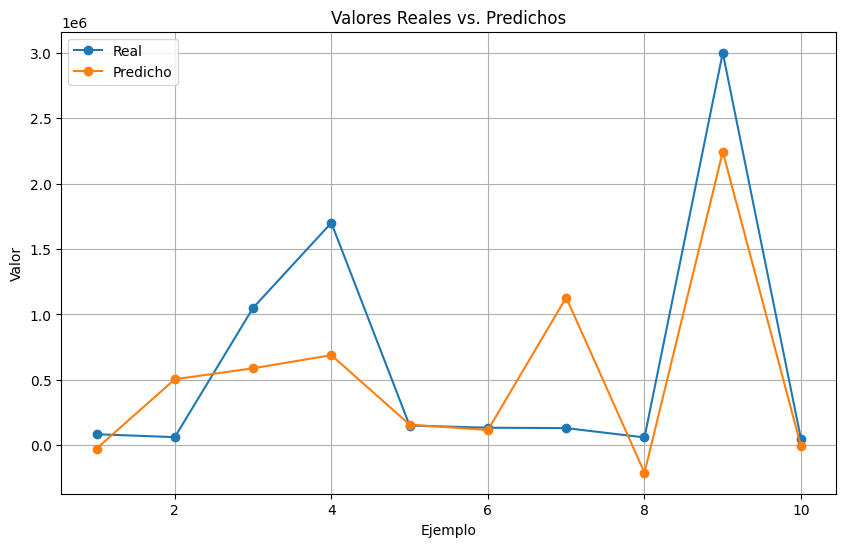

In [63]:
import random
import matplotlib.pyplot as plt

# Número de ejemplos a mostrar en el gráfico
num_examples_to_show = 10

# Obtén índices aleatorios de ejemplos en el conjunto de prueba
random_indices = random.sample(range(len(X_test)), num_examples_to_show)

# Crear listas para almacenar valores reales y predichos
real_values = []
predicted_values = []

for i in random_indices:
    real_value = scaler_y.inverse_transform(y_test[i].reshape(-1, 1))[0][0]
    predicted_value = scaler_y.inverse_transform(y_pred[i].detach().numpy().reshape(-1, 1))[0][0]
    real_values.append(real_value)
    predicted_values.append(predicted_value)

# Crear una lista de números de ejemplo para etiquetas en el gráfico
example_numbers = list(range(1, num_examples_to_show + 1))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(example_numbers, real_values, marker='o', linestyle='-', label='Real')
plt.plot(example_numbers, predicted_values, marker='o', linestyle='-', label='Predicho')
plt.xlabel('Ejemplo')
plt.ylabel('Valor')
plt.title('Valores Reales vs. Predichos')
plt.legend()
plt.grid(True)
plt.show()
